## A/B Testing on Marketing Campaigns

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()
import os

In [12]:
df = pd.read_csv(r"datasets/campaigns.csv")

In [13]:
df.head(10)

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,2,Medium,5,2,1,27.81
5,2,Medium,5,2,2,34.67
6,2,Medium,5,2,3,27.98
7,2,Medium,5,2,4,27.72
8,3,Medium,12,1,1,44.54
9,3,Medium,12,1,2,37.94


In [14]:
print(f'Rows          :{df.shape[0]}')
print(f'Columns       :{df.shape[1]}')
print(f'Features      :{df.columns.tolist()}')
print(f'Missing Values:{df.isnull().values.sum()}')
print(f'Unique Values :\n\n{df.nunique()}')

Rows          :548
Columns       :6
Features      :['OutletID', 'MarketSize', 'AgeofOutlets', 'Campaigns', 'Week', 'SalesInThousands']
Missing Values:0
Unique Values :

OutletID            137
MarketSize            3
AgeofOutlets         25
Campaigns             3
Week                  4
SalesInThousands    517
dtype: int64


In [15]:
df.describe()

,OutletID,AgeofOutlets,Campaigns,Week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,479.656934,8.503650,2.029197,2.500000,53.466204
std,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,216.000000,4.000000,1.000000,1.750000,42.545000
50%,504.000000,7.000000,2.000000,2.500000,50.200000
75%,708.000000,12.000000,3.000000,3.250000,60.477500
max,920.000000,28.000000,3.000000,4.000000,99.650000


### EDA and Visualizations

C:\Users\admin\AppData\Local\Temp\ipykernel_6268\1542255346.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = df.groupby('Campaigns').sum()['SalesInThousands'].plot.pie(figsize=(8,8),autopct='%1.0f%%',explode=(0,0.1,0),textprops= {'fontsize' : 15})


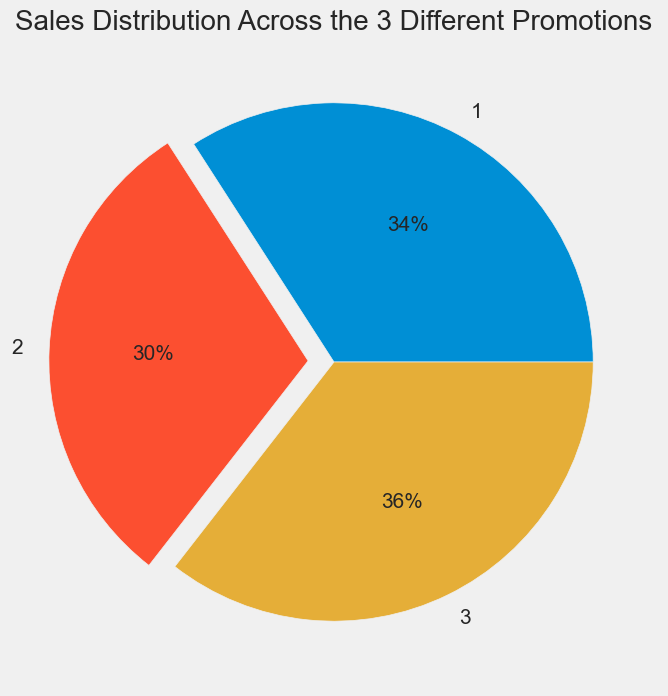

In [18]:
# Create some plots to visualize our sales and marketting data
# Using fivethirtyeight style on matplotlib

plt.style.use('fivethirtyeight')
ax = df.groupby('Campaigns').sum()['SalesInThousands'].plot.pie(figsize=(8,8),autopct='%1.0f%%',explode=(0,0.1,0),textprops= {'fontsize' : 15})
ax.set_ylabel('')
ax.set_title("Sales Distribution Across the 3 Different Promotions", fontsize =20)

plt.show()

In [20]:
# Now let's view the promotions for each market size
df.groupby(["Campaigns","MarketSize"]).count()["OutletID"].unstack('MarketSize')

MarketSize,Large,Medium,Small
Campaigns,,,
1,56,96,20
2,64,108,16
3,48,116,24


Text(0.5, 1.0, 'Breakdowns of Market Sizes across Different Campaigns')

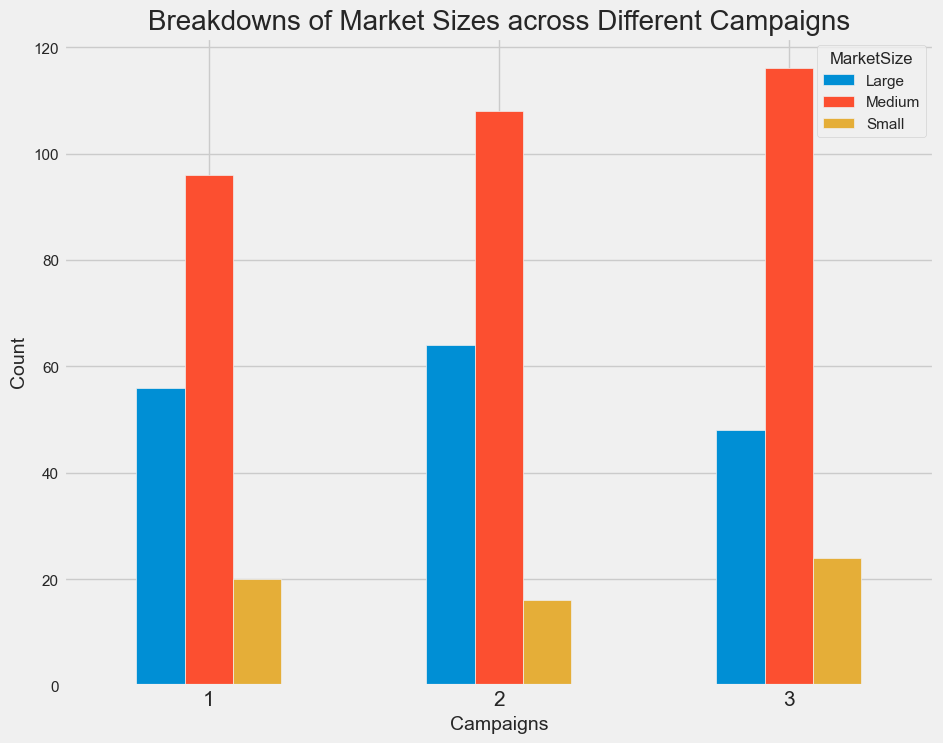

In [21]:
# Put this into a plot 
ax =df.groupby(['Campaigns','MarketSize']).count()['OutletID'].unstack("MarketSize").plot(kind = "bar",figsize=(10,8),grid = True)
ax.tick_params(axis = 'x',labelsize =15)
plt.xticks(rotation = "horizontal")
ax.set_ylabel('Count')
ax.set_title("Breakdowns of Market Sizes across Different Campaigns",fontsize = 20)

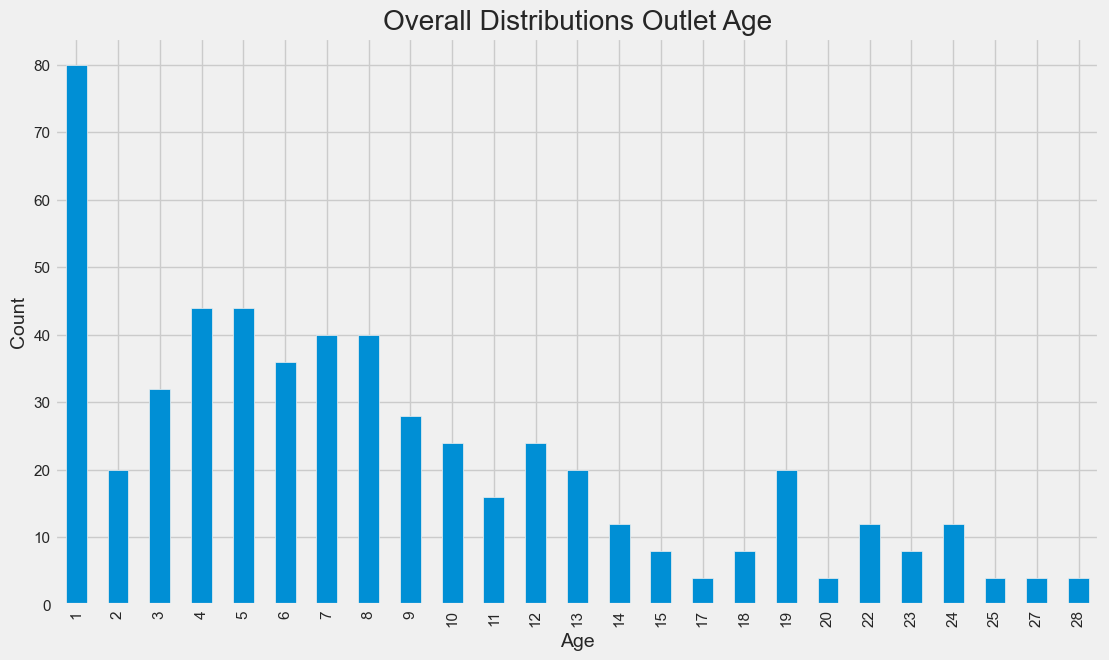

In [22]:
ax =df.groupby("AgeofOutlets").count()["OutletID"].plot(kind = "bar",figsize =(12,7),grid =True)
ax.set_ylabel("Count")
ax.set_xlabel("Age")
ax.set_title("Overall Distributions Outlet Age")

plt.show()

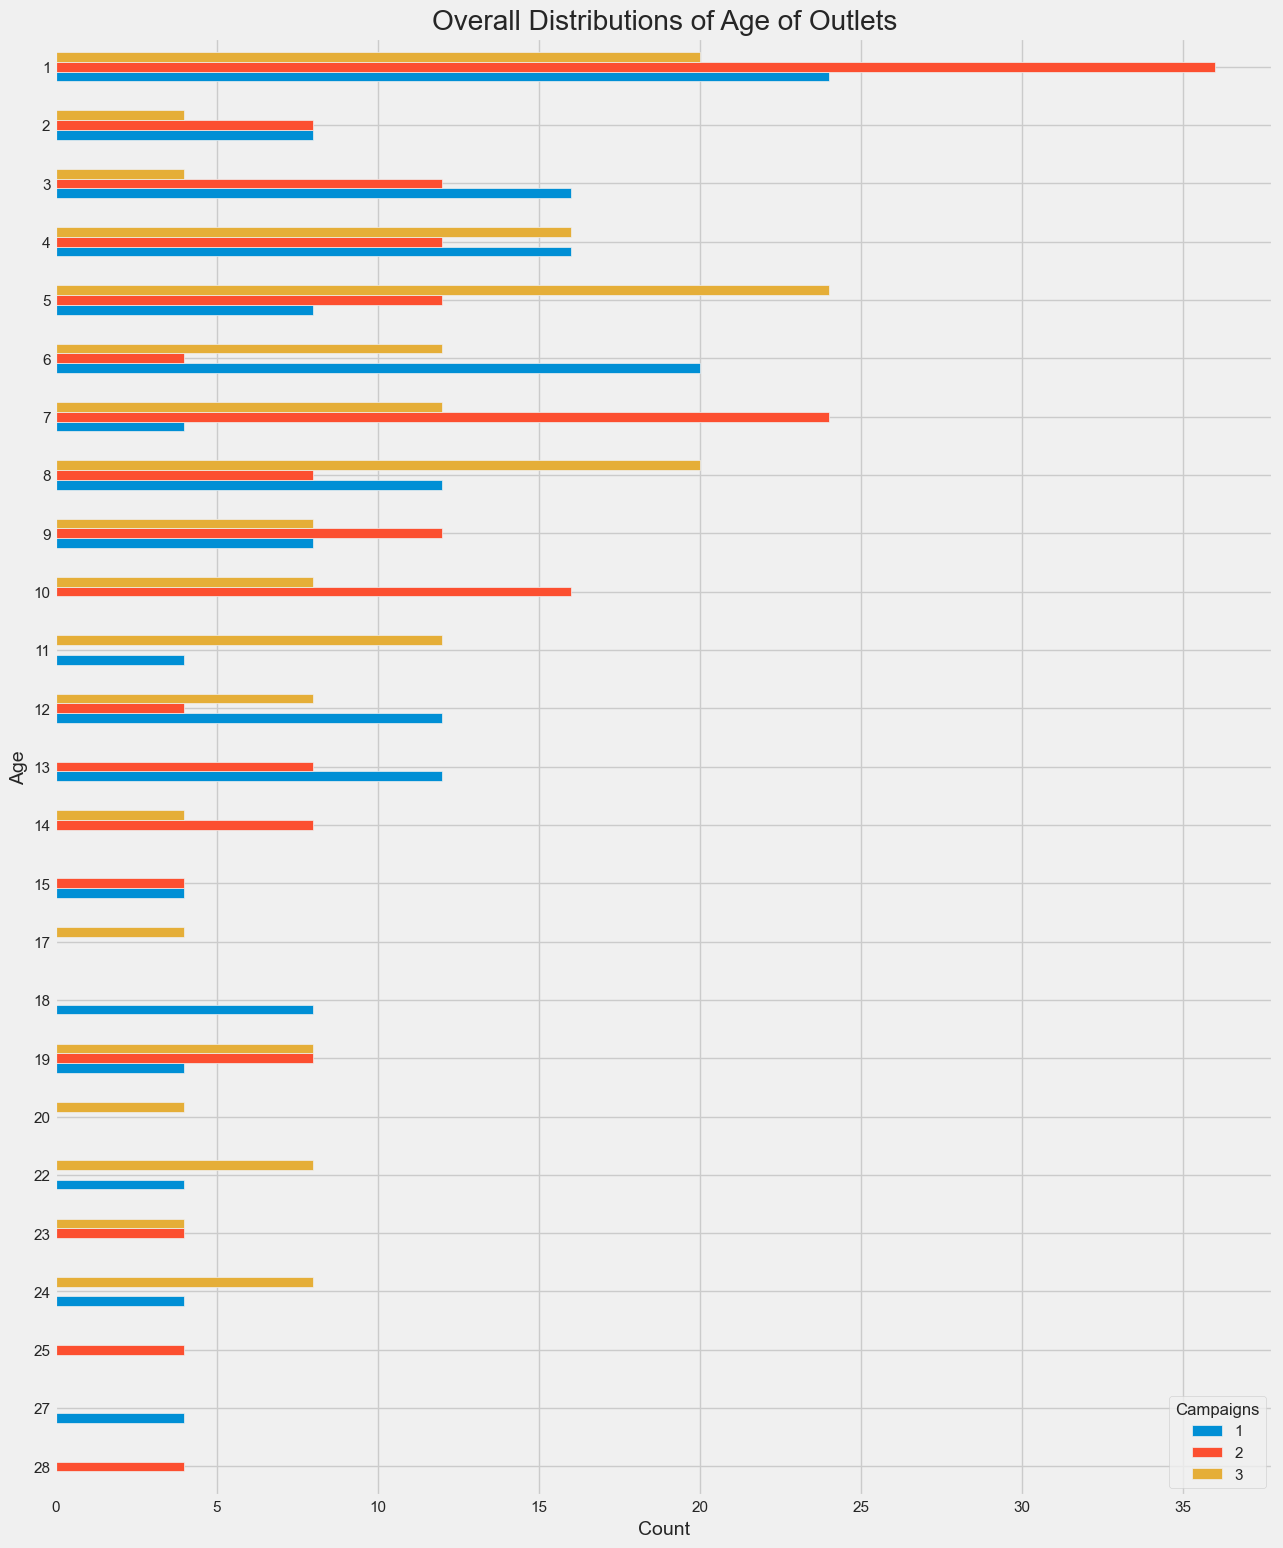

In [25]:
# Visualise this summary 
ax =df.groupby(["AgeofOutlets","Campaigns"]).count()["OutletID"].unstack("Campaigns").iloc[::-1].plot(kind = "barh",figsize = (14,18),grid = True)
ax.set_xlabel('Count')
ax.set_ylabel('Age')
ax.set_title("Overall Distributions of Age of Outlets")

plt.show()

In [26]:
# Every Campaigns has similar age profiles and the average outlet age is around 8 ~ 9 years
# Majority of the outlet are around 10 ~ 12 years old or younger

df.groupby('Campaigns').describe()["AgeofOutlets"]

,count,mean,std,min,25%,50%,75%,max
Campaigns,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


### Performing A/B Testing on Three Marketing campaigns

In [29]:
means =df.groupby("Campaigns").mean()["SalesInThousands"]
stdev = df.groupby("Campaigns").std()["SalesInThousands"]
obs = df.groupby("Campaigns").count()["SalesInThousands"]
print(f"===== MEAN ====== \n{means}\n")
print(f"===== STANDARD DEVIATION ====== \n{stdev}\n")
print(f"===== OBSERVATIONS ====== \n{obs}\n")

===== MEAN ====== 
Campaigns
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

===== STANDARD DEVIATION ====== 
Campaigns
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

===== OBSERVATIONS ====== 
Campaigns
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64



C:\Users\admin\AppData\Local\Temp\ipykernel_6268\2627548552.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means =df.groupby("Campaigns").mean()["SalesInThousands"]
C:\Users\admin\AppData\Local\Temp\ipykernel_6268\2627548552.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stdev = df.groupby("Campaigns").std()["SalesInThousands"]


### A/B Testing: 1st Campaigns vs 2nd Campaigns

In [31]:
# Computing the t and p values using scipy
t,p= stats.ttest_ind(df.loc[df["Campaigns"] == 1, "SalesInThousands"].values,
                    df.loc[df["Campaigns"]== 2, "SalesInThousands"].values,equal_var = False)
print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


### Analysis of P and t-values (1 vs 2)

Our p-Value is close to 0 which means that there is good evidence to **reject the null Hypothesis.**
Meaning that there is a statistical difference between the two groups.Our threshold for rejecting the Null Hypothesis is usually less than 0.05.

Furthermore, the t-test shows that  the marketing performances for these two groups are significantly different and that first marketing campaigns outperforms second marketing campaigns.

### A/B Testing: 1st Campaigns vs 3rd Campaigns

However, if we run a t-test between the promotion group 1 and promotion group 3, we see  different results:

In [37]:
t,p = stats.ttest_ind(df.loc[df["Campaigns"]==1,'SalesInThousands'].values,
                     df.loc[df["Campaigns"]==3,"SalesInThousands"].values,equal_var= False)
print(f't-value = {str(t)}')
print(f"p-value = {str(p)}")

t-value = 1.5560224307758634
p-value = 0.12059147742229478


### Analysis of P and t-values (1 vs 3)

We note that the average from first marketing campaigns (58.1) is higher than those from third marketing campaigns (55.36). But, running a t-test between these two groups, gives us a t-value of 1.556 and p-value of 0.121. The computed p-value is a lot higher than 0.05, past the threshold for statistical significance. 

### A/B Testing: 2nd Campaigns vs 3rd Campaigns

In [41]:
t,p = stats.ttest_ind(df.loc[df["Campaigns"]==2 ,"SalesInThousands"].values,
                     df.loc[df["Campaigns"] ==3,"SalesInThousands"].values,equal_var=False)
print(f"t-value = {str(t)}")
print(f"p-value = {str(p)}")

t-value = -4.88139271089348
p-value = 1.5692733176039892e-06


### Analysis of P and t-values (2 vs 3)

Based on the average sales, second marketing campaigns (47.33) is higher than those from third marketing campaigns(55.36). If we run t-test and between these two campaigns, results shows that the p-value (0.000001569) is lower than 0.05 threshold which concludes that it **rejects null hypotheses.** In other words, there's statistical difference between second marketing campaigns and third marketing campaigns. 